<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/serie_de_fourier_generalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange;"> Fórmula de los Coeficientes de fourier Generalizada</span>
<span style="color:blue;">**$C_n= \frac{\int_{a}^{-b} u(x) f_n(x) \sigma(x) \, dx}{\int_{a}^{-b} f_n^2(x) \sigma(x) \, dx} \quad \text{para } n = 1, 2, 3$**</span>

donde

$u(x)= \sum_{n=1}^{\infty} c_n f_n(x) \qquad \text{con } a≤x≤b$

## <span style="color:orange;"> *Ejemplo:*</span>
Dada $\quad f''(x)+df(x)=0 \quad 0≤x≤1$
con
$\quad f(0)=0 \quad$
$\quad hf(1)+f'(1)=0$

donde

$p(x)=1. \quad q(x)=0, \quad \sigma(x)=1$

$k_1=1,  \quad k_2=0,  \quad k_3=2,  \quad k_4= 1$

con ecuación característica

$tan(ʖ)=ʖ$

Y solución

*   $c_1=2.0288$
*   $c_2=4.9132$
*   $c_3=7.9787$
*   $c_4=10.0855$
*   $c_5=14.2074$
  ...

  $\quad f_n(x)= \sin (ʖ_nx)$


importamos librerias

C_1 = 1.9184
C_2 = 0.1572
C_3 = 0.3390
C_4 = 0.5246
C_5 = 0.1696
Serie aproximada u_aprox(x):
1.9184⋅sin(2.0288⋅x) + 0.1572⋅sin(4.9132⋅x) + 0.339⋅sin(7.9787⋅x) + 0.5246⋅sin ↪

↪ (10.0855⋅x) + 0.1696⋅sin(14.2074⋅x)


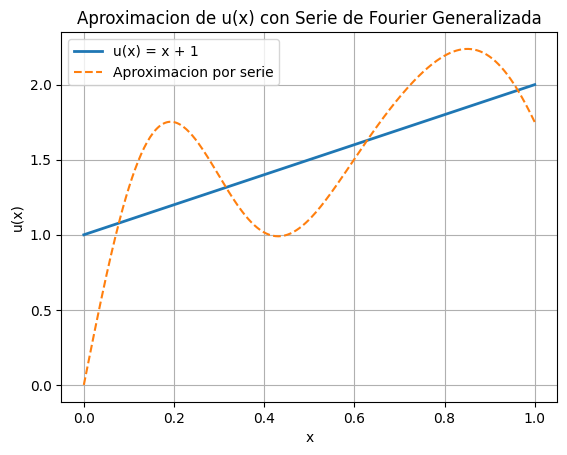

In [1]:
import sympy as sp



# Declaramos la variable simbolica
x = sp.Symbol('x')



zeta_vals = [2.0288, 4.9132, 7.9787, 10.0855, 14.2074]



# Definimos la funcion u(x)
# Funcion u(x)
u = x + 1



# Lista para almacenar los resultados
C_n_vals = []




for n, zeta_n in enumerate(zeta_vals, start=1):
    f_n = sp.sin(zeta_n * x) #Definimos f_n=sen(zeta_n*x)
    numerador = sp.integrate(u * f_n, (x, 0, 1)) #aqui se define u*f_n*sigma (numerador)
    denominador = sp.integrate(f_n**2, (x, 0, 1)) #aqui se define f_n^2 (denominador)
    C_n = numerador / denominador #Calculamos C_n
    C_n_eval = round(C_n.evalf(), 4)
    C_n_vals.append(C_n_eval)
    print(f"C_{n} = {C_n_eval}")




# Construir la suma simbolica
u_aprox = sum(C * sp.sin(z * x) for C, z in zip(C_n_vals, zeta_vals)) #aproximamos con la serie generalizada de fourier hasta el 煤ltimo valor de z
print("Serie aproximada u_aprox(x):")
sp.pprint(u_aprox)




# Convertir a funcion numerica para graficar
u_func = sp.lambdify(x, u, "numpy")
u_aprox_func = sp.lambdify(x, u_aprox, "numpy")



import numpy as np


# Evaluar en puntos
x_vals = np.linspace(0, 1, 300)
y_real = u_func(x_vals)
y_aprox = u_aprox_func(x_vals)





import matplotlib.pyplot as plt




# Graficar
plt.plot(x_vals, y_real, label="u(x) = x + 1", linewidth=2)
plt.plot(x_vals, y_aprox, label="Aproximacion por serie", linestyle='--')
plt.title("Aproximacion de u(x) con Serie de Fourier Generalizada")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

C_1 = 0.213285
C_2 = 0.104047
C_3 = -0.021978
C_4 = 0.020005
C_5 = -0.008350


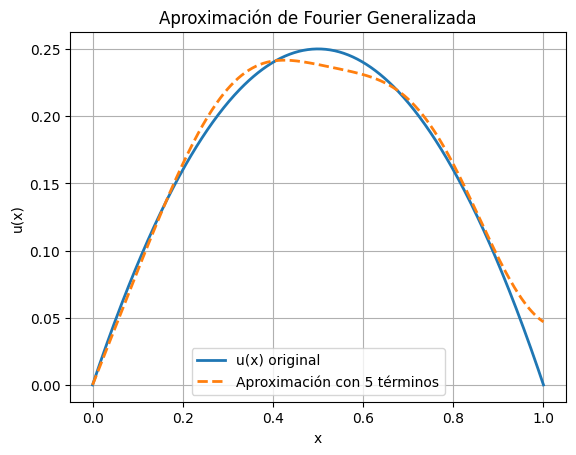

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Valores de s_n (raíces de tan(s) = s)
s_vals = [2.0288, 4.9132, 7.9787, 10.0855, 14.2074]

# Definimos las funciones base f_n(x) = sin(s_n x)
def f_n(x, n):
    return np.sin(s_vals[n-1] * x)

# Definimos sigma(x) = 1 (según los datos)
def sigma(x):
    return 1

# Definimos una función u(x) a representar. Puedes cambiarla.
def u(x):
    return x * (1 - x)  # Ejemplo: función parabólica

# Cálculo de los coeficientes C_n con la fórmula de Fourier generalizada
def coef_fourier_generalizado(n):
    num = spi.quad(lambda x: u(x) * f_n(x, n) * sigma(x), 0, 1)[0]
    den = spi.quad(lambda x: f_n(x, n)**2 * sigma(x), 0, 1)[0]
    return num / den

# Calcular los primeros 5 coeficientes
N = 5
C = [coef_fourier_generalizado(n) for n in range(1, N+1)]

# Mostrar los coeficientes
for i, c in enumerate(C, 1):
    print(f"C_{i} = {c:.6f}")

# Reconstrucción de u(x) con la serie truncada
x_vals = np.linspace(0, 1, 500)
u_approx = np.zeros_like(x_vals)
for n in range(1, N+1):
    u_approx += C[n-1] * f_n(x_vals, n)

# Graficar la función original y su aproximación
plt.plot(x_vals, u(x_vals), label='u(x) original', linewidth=2)
plt.plot(x_vals, u_approx, '--', label=f'Aproximación con {N} términos', linewidth=2)
plt.legend()
plt.title("Aproximación de Fourier Generalizada")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.show()

Coeficientes de Fourier Generalizados
n     s_n          C_n            
-----------------------------------
1     2.028800     0.2132854553   
2     4.913200     0.1040465743   
3     7.978700     -0.0219781718  
4     10.085500    0.0200053201   
5     14.207400    -0.0083500726  


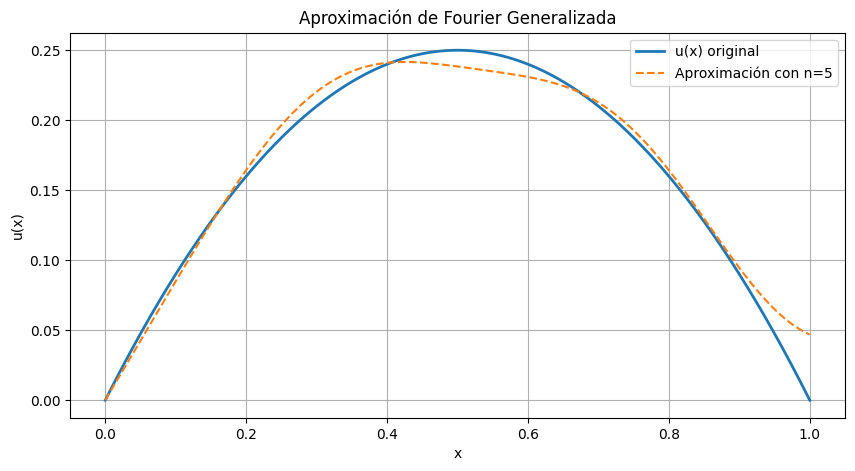

In [ ]:
import numpy as np
from scipy.integrate import quad

# 1. Definir parámetros del problema
s_n = [2.0288, 4.9132, 7.9787, 10.0855, 14.2074]  # Raíces de tan(s) = s
a, b = 0, 1  # Límites de integración

# 2. Definir u(x) (EJEMPLO: función de prueba. ¡Reemplazar con tu función!)
def u(x):
    return x*(1-x)  # Ejemplo: función parabólica

# 3. Funciones base f_n(x) = sin(s_n x)
def f_n(x, n):
    return np.sin(s_n[n-1] * x)

# 4. Calcular coeficientes C_n para n=1..5
def compute_coefficients(u, max_n=5):
    coefficients = []
    for n in range(1, max_n+1):
        # Numerador: integral de u(x)*f_n(x)
        numerator, _ = quad(lambda x: u(x) * f_n(x, n), a, b)

        # Denominador: integral de f_n(x)^2
        denominator, _ = quad(lambda x: f_n(x, n)**2, a, b)

        C_n = numerator / denominator
        coefficients.append((n, s_n[n-1], C_n))
    return coefficients

# 5. Ejecutar cálculo y mostrar resultados
coefficients = compute_coefficients(u)

print("Coeficientes de Fourier Generalizados")
print("{0:<5} {1:<12} {2:<15}".format("n", "s_n", "C_n"))
print("-"*35)
for n, s, cn in coefficients:
    print(f"{n:<5} {s:<12.6f} {cn:<15.10f}")

# 6. Visualización (opcional)
import matplotlib.pyplot as plt
x_vals = np.linspace(a, b, 500)

plt.figure(figsize=(10,5))
plt.plot(x_vals, u(x_vals), label='u(x) original', linewidth=2)

# Aproximación con los 5 primeros términos
approx = sum(cn * f_n(x_vals, n) for n, (_, _, cn) in enumerate(coefficients, 1))
plt.plot(x_vals, approx, '--', label='Aproximación con n=5')

plt.title("Aproximación de Fourier Generalizada")
plt.xlabel("x"); plt.ylabel("u(x)")
plt.legend(); plt.grid(True)
plt.show()